# P7 Chapter 4 Case Study 1 The Centres for the Emergence of the Discipline of Anthropology (CEDA) #

## Thesis Chapter 6 Section 6.20 ##

File name: jnb_hddt_ceda_dyn_edges

# 4.1 HDDT Visualisations - CEDA bigraph #

## This project explores 4 of 5 'foundation societies' recognised by RAI, and 1 'origin' society (the CQA) add by me. ##

| Society | abv. | Dates
| --- | --- | --- |
| Quaker Committee on the Aborigines* | QCA | 1832/37 - 1846 |
| Aborigines Protection Society | APS | 1837 - 1919 |
| Ethnological Society of London | ESL | 1843 - 1871 |
| Anthropological Society of London | ASL | 1863 - 1871 |
| Anthropological Institute | AI | 1843 - 1871 |
| London Anthropological Society** | LAS | 1873 - 1874 |

* Origin Society included in this project but not recognised by RAI.
** not included in this project (beyond 1871 cut off date).

In [1]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, 
#needs to be imported separately.
import nbconvert
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
import seaborn as sn
import numpy as np

plt.rcParams.update({'font.size': 18})

plt.rc('figure', figsize=(20, 10))


# 4.2 The CEDA 1830 - 1870 #

<img src="quakers_dynamic.png">

# 4.3 The Quaker Committee on the Aborigines (QCA)  1837 -1846 #

### Because there are only 30 members of the QCA we can iist all of them here ###

The Quaker committee on the Aborigines, was a Quaker Committee of Enquiry. A committee formed by, and exclusively manned by Quakers. It met, performed its enquiries and  reported its findings and recommendations to the Quaker Meetings for Sufferings, the standing committee of London Yearly Meeting which was the National Assembly of Quakers in Britain at the time. The committees remit, rules of engagement and characteristics woiuld have been agreed by the national assembly and the committee would no doubt have reported in the manner of Friends. The committee was formed to explore and take up a ‘concern’ amongst Quakers, initially to consider promoting the Gospel amongst the aborigines in 1832 (prompted by similar actions popular at the time among other evangelical churches). But it changed its remit in 1837 to instead take up a philanthropic concern deriving from the group’s increasing awareness through its activities of the plight of aborigines. Therefore, what began as a Quaker Committee of Enquiry to consider promoting the Gospel to Aborigines, soon transformed into the Quaker Committee on the Aborigines, concerned with the plight of the aborigines throughout the colonies, and it’s relief.

In [2]:
qca = pd.read_csv ('vw_4_ceda_membership_quakers_qca2.csv')
qca['birth_year'] = qca ['birth_year'].fillna(0).astype(np.int64)
qca['death_year'] = qca['death_year'].fillna(0).astype(np.int64)
qca.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    30 non-null     object
 1   birth_year              30 non-null     int64 
 2   death_year              30 non-null     int64 
 3   religion_name           30 non-null     object
 4   ceda_name               30 non-null     object
 5   person_ceda_first_year  30 non-null     int64 
 6   person_ceda_last_year   30 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 1.8+ KB


In [3]:
qca

,Name,birth_year,death_year,religion_name,ceda_name,person_ceda_first_year,person_ceda_last_year
0,Thomas (1) Hodgkin,1798,1866,Quaker,QCA,1839,1847
1,James Bowden,0,0,Quaker,QCA,1842,1847
2,William Nash,0,0,Quaker,QCA,1842,1847
3,Joseph Sturge,0,0,Quaker,QCA,1842,1847
4,William Jun Grimshaw,0,0,Quaker,QCA,1840,1847
5,Henry Knight,0,0,Quaker,QCA,1840,1847
6,Edward Paull,0,0,Quaker,QCA,1840,1847
7,Robert Jun Alsop,0,0,Quaker,QCA,1837,1847
8,Abram Rawlinson Barclay,0,0,Quaker,QCA,1837,1839
9,John Barclay,0,0,Quaker,QCA,1837,1839


# 4.4 CQA Joiners each year #

We can plot the number of joiners in each year. New members joined only in the years 1837, 1839, 1840 and 1842. We know that the QCA was established in 1837, so there were only three years when new members joined.

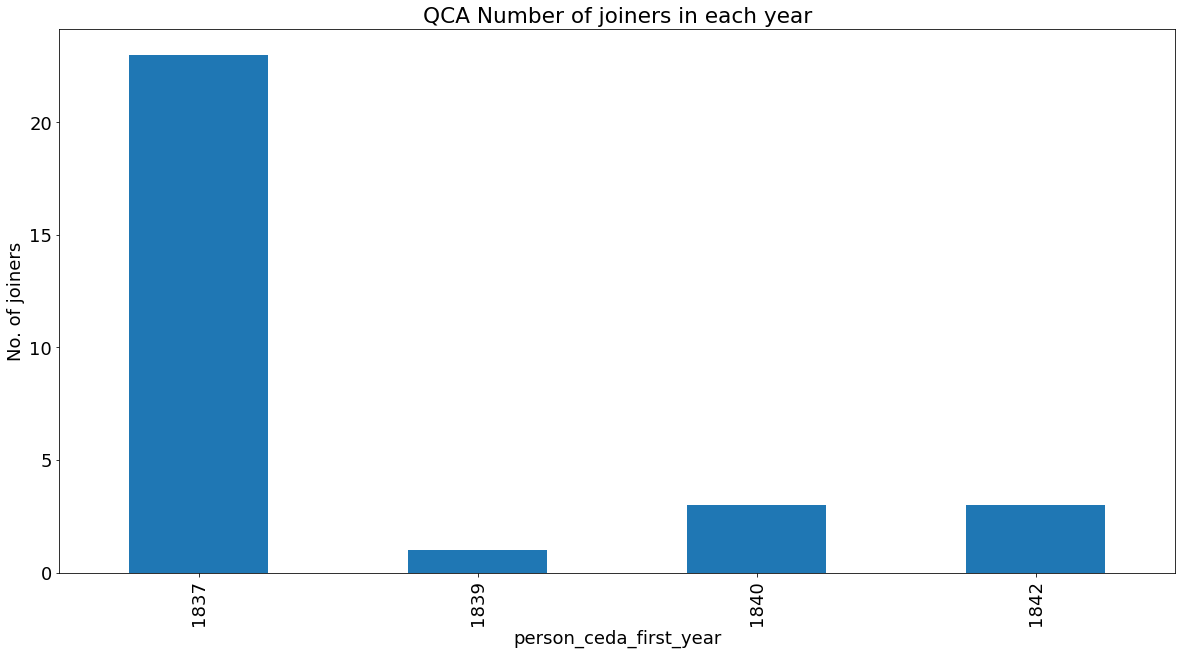

In [4]:
qca.groupby('person_ceda_first_year')['Name'].nunique().plot(kind='bar')
plt.title ("QCA Number of joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 4.5 CQA Leavers each year #

Because new members group in specific years, we chart the number of leavers in each year. Members left in 1839, 1842 1nd 1847. we know that the QCA was 'laid down' (disbanded) in 1847 which leaves only two years when members left the committee.

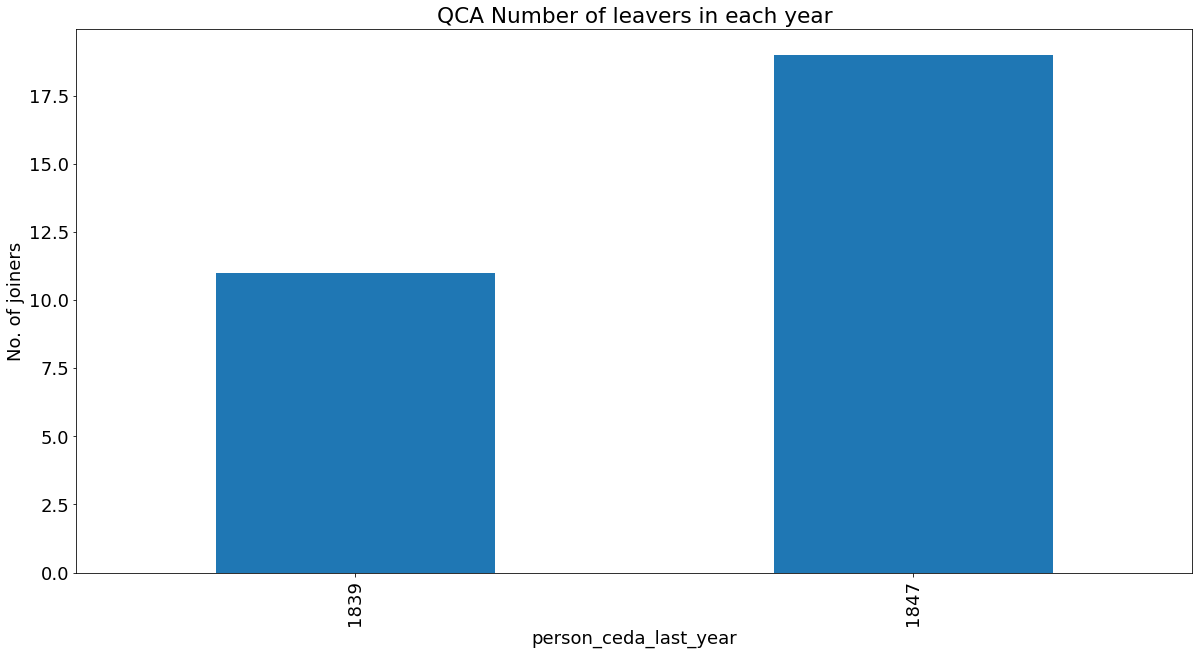

In [5]:
qca.groupby('person_ceda_last_year')['Name'].nunique().plot(kind='bar')
plt.title ("QCA Number of leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

We can elsewhere investigate why in 1839, 11 members left and 1 joined (Thomas Hodgkin). 3 more joined in each of 1840 and 1842.

# 4.6 Duration in the CEDA #

In [6]:
qca[(qca['person_ceda_first_year'] == 1837) & (qca['person_ceda_last_year'] == 1847)]

,Name,birth_year,death_year,religion_name,ceda_name,person_ceda_first_year,person_ceda_last_year
7,Robert Jun Alsop,0,0,Quaker,QCA,1837,1847
11,John Thomas Barry,0,0,Quaker,QCA,1837,1847
12,Peter Bedford,0,0,Quaker,QCA,1837,1847
16,Josiah Forster,0,0,Quaker,QCA,1837,1847
17,Robert Forster,0,0,Quaker,QCA,1837,1847
18,William Forster,0,0,Quaker,QCA,1837,1847
19,Joseph Talwin Foster,0,0,Quaker,QCA,1837,1847
21,Edwd Harris,0,0,Quaker,QCA,1837,1847
25,Joseph Neatby,0,0,Quaker,QCA,1837,1847
26,John Sanderson,0,0,Quaker,QCA,1837,1847


												
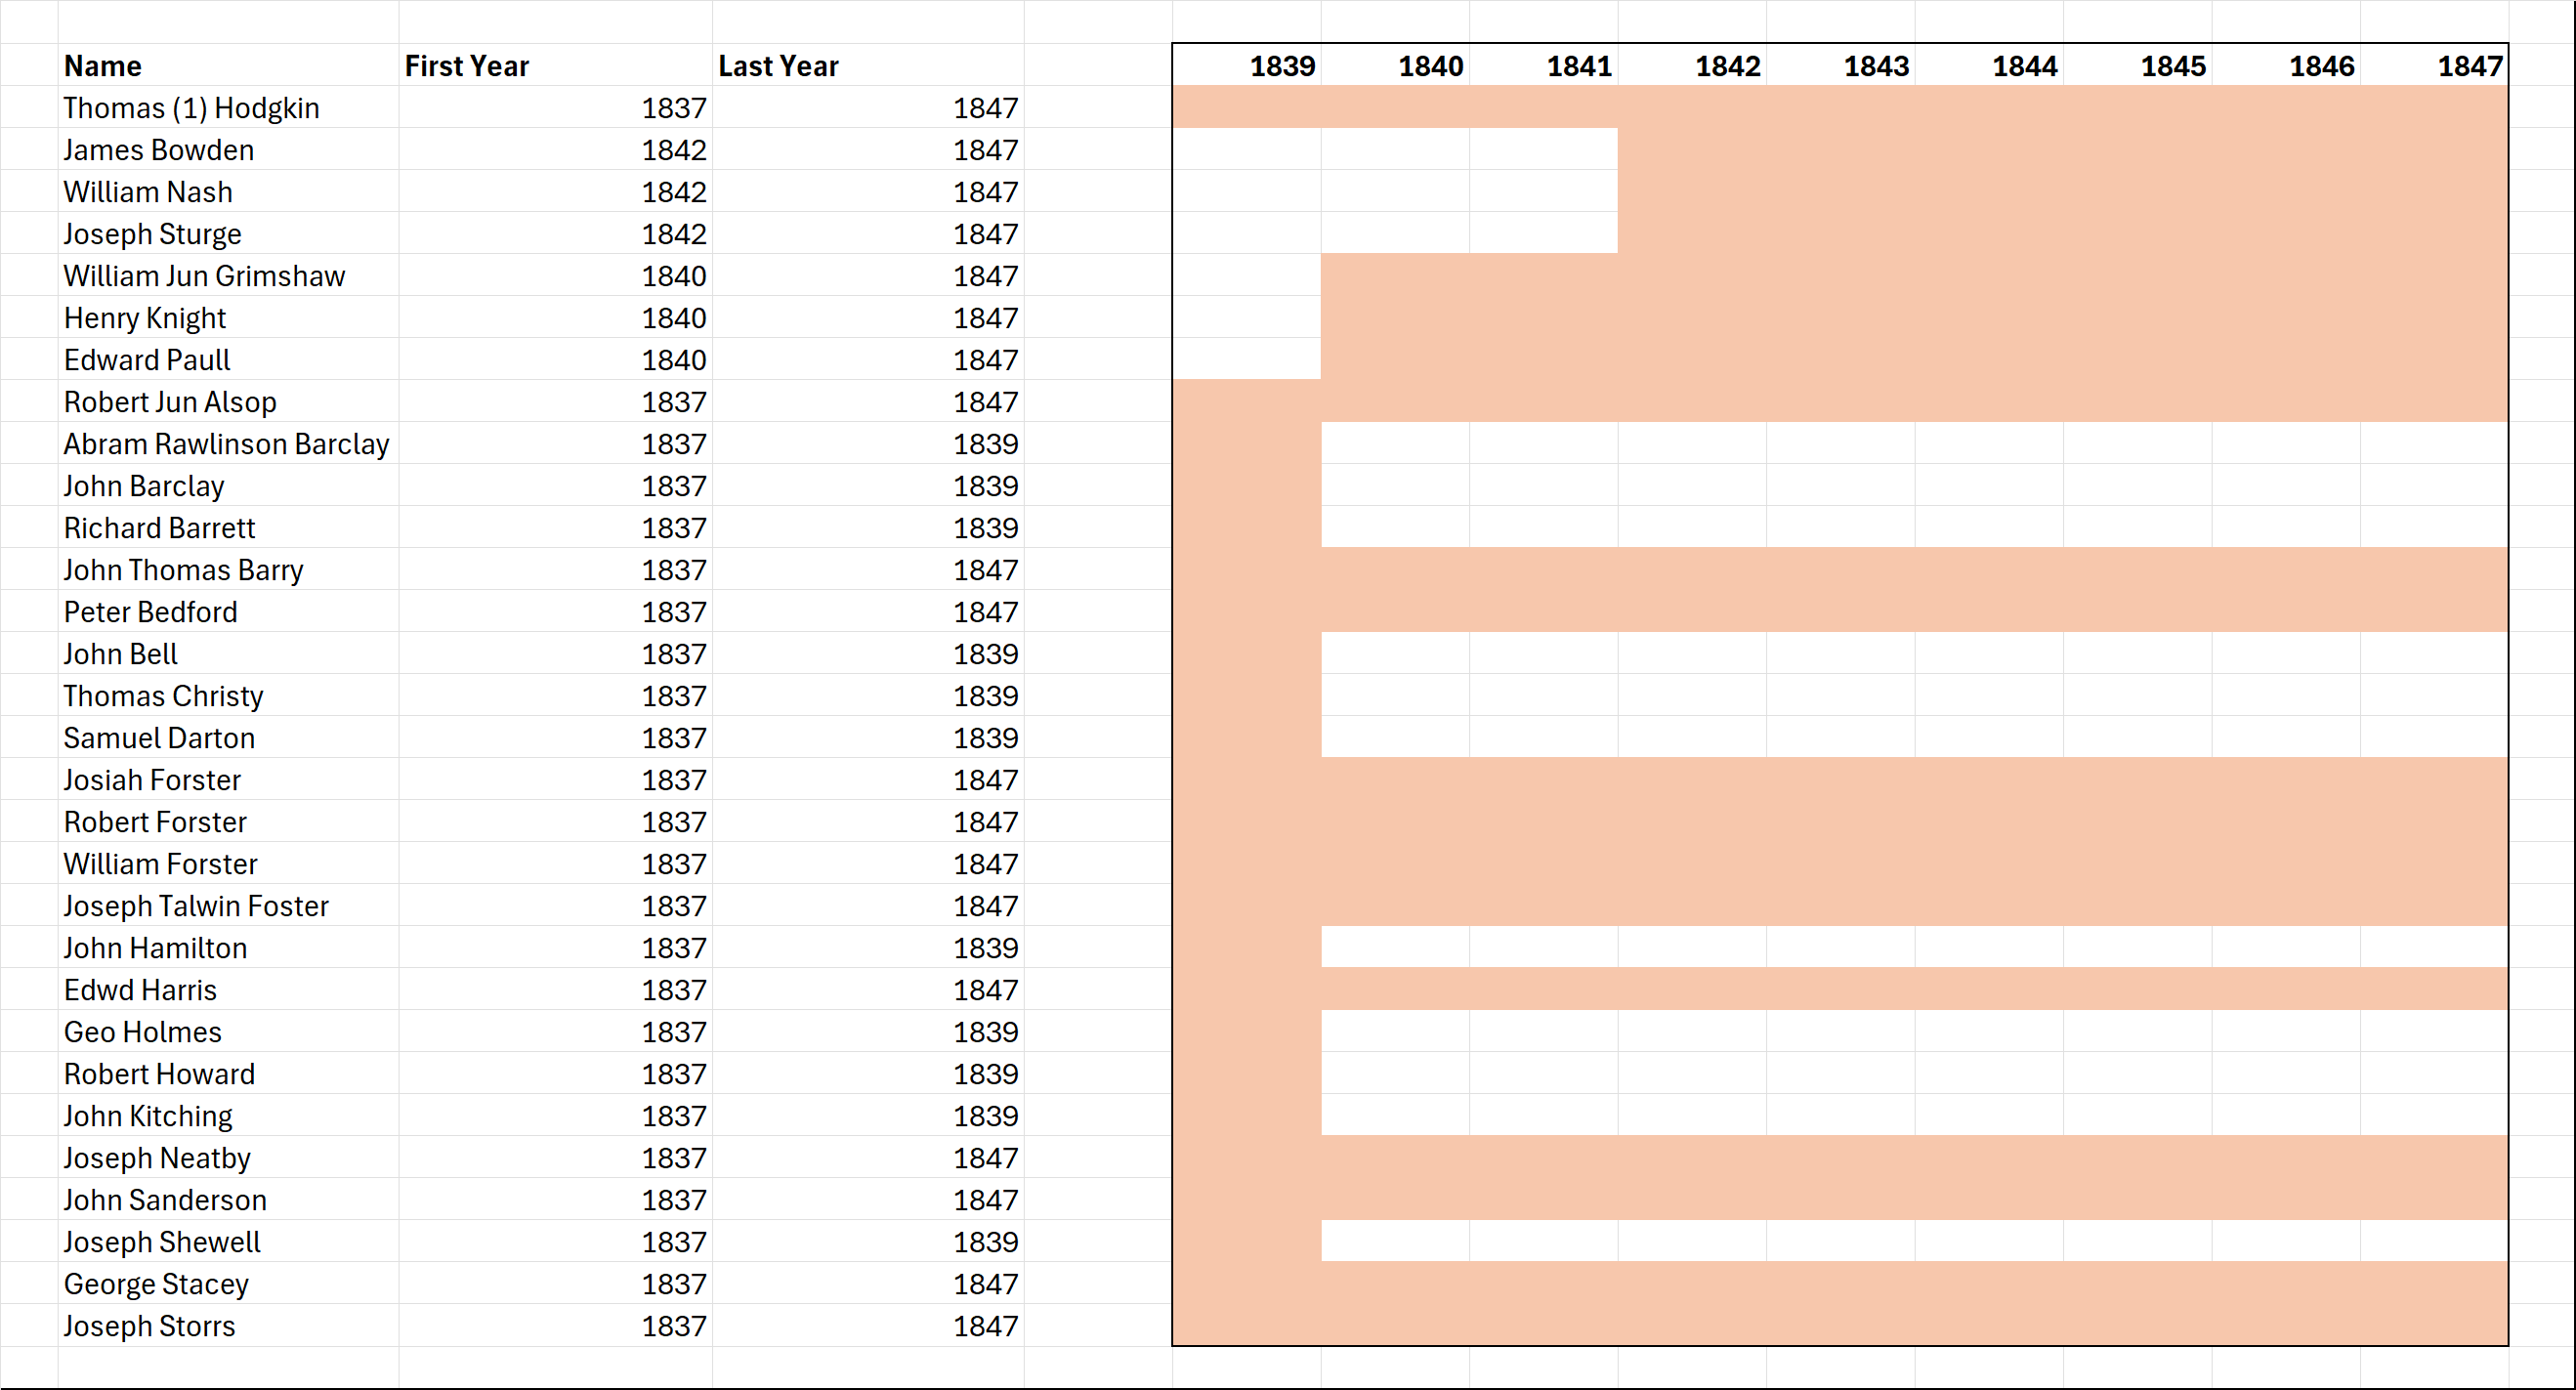

12 of the original members were members throughout the life of the committee. 11 of the original members left after the first year. 3 new members in 1840 and 3 new members in 1841.In any year the majority of members were 'permanent' members.

# 4.7 The Aborigines Protection Society (APS) 1837 -1919 #

The database contains the names of 1171 members of the APS from its foundation in 1838 to 1871 when it merged with Anti-Slavery International. 571 members (49%) are Quaker. 

The Aborigines Protection Society was a secular pressure group that lobbied the Colonial Office and Parliament for the relief of the plight of aborigines throughout the British Settlements. It had a mixed Quaker and non-Quaker executive, membership and subscription lists (it was in large part drawn from the Quaker Committee on the Aborigines), and Quakers dominated the agenda and publishing and lobbying activities of the society for at least the first 30 years of the Society’s life. The Society met, performed its enquiries and reported its findings and recommendations to the Society’s members according to its own constitution (it usually met monthly). The Society’s remit, rules of engagement and characteristics were similar to those of the many other secular lobbying and public opinion forming societies of the time.

In [7]:
aps = pd.read_csv ('vw_4_ceda_membership_dates_aps.csv')
aps['birth_year'] = aps ['birth_year'].fillna(0).astype(np.int64)
aps['death_year'] = aps['death_year'].fillna(0).astype(np.int64)
aps.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1170 non-null   object
 1   birth_year  1170 non-null   int64 
 2   death_year  1170 non-null   int64 
 3   Target      1170 non-null   object
 4   first_year  1170 non-null   int64 
 5   last_year   1170 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 55.0+ KB


In [8]:
aps

,Name,birth_year,death_year,Target,first_year,last_year
0,William Aldam,1813,1890,APS,1838,1848
1,Samuel C Baker,1821,1893,APS,1839,1871
2,James Bell,1818,1872,APS,1847,1862
3,John Bell (2),1811,1895,APS,1838,1855
4,John Brown,1801,1879,APS,1839,1839
...,...,...,...,...,...,...
1165,x Wright,0,0,APS,1839,1850
1166,W Wrigley,0,0,APS,1861,1862
1167,James Yates,0,0,APS,1853,1856
1168,John Young,0,0,APS,1840,1840


# 4.8 APS joiners in each year #

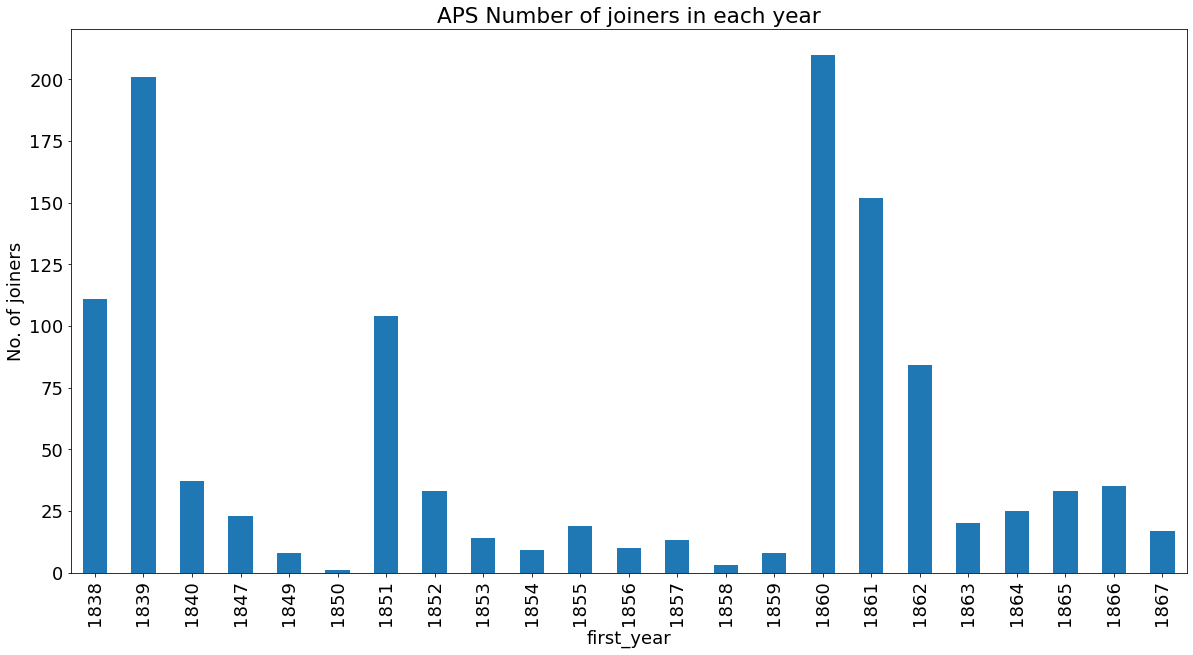

In [9]:
aps.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("APS Number of joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 4.9 APS leavers in each year #

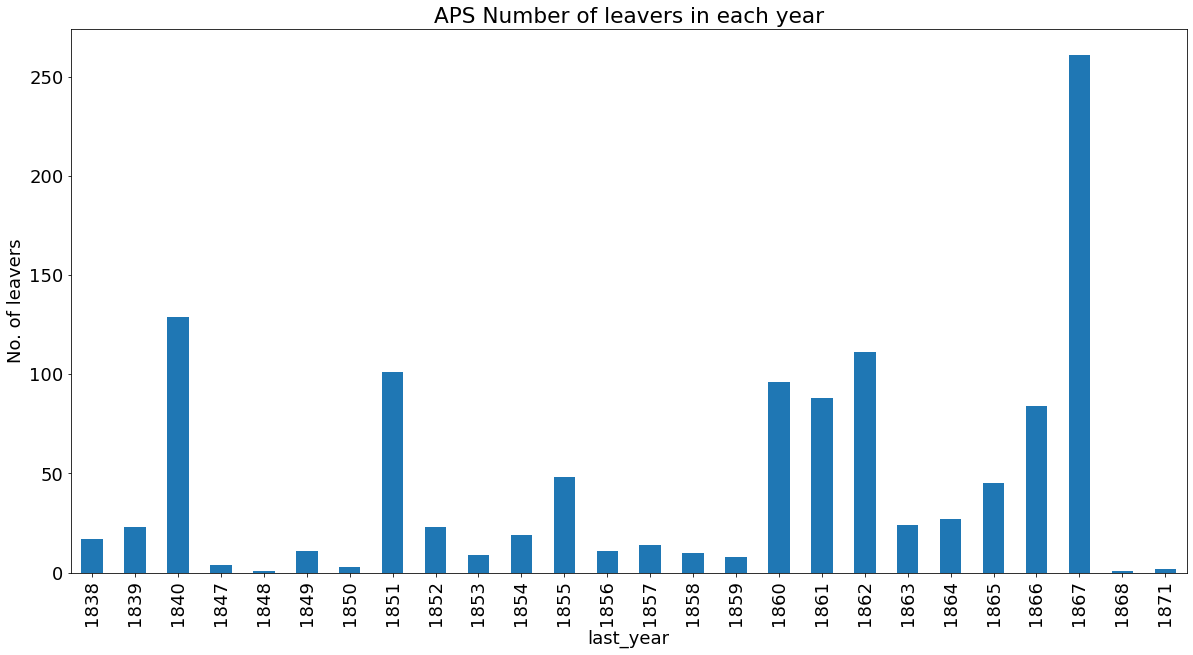

In [10]:
aps.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("APS Number of leavers in each year")
plt.ylabel ("No. of leavers")
plt.show()

In [11]:
quakers_aps = pd.read_csv ('vw_4_ceda_membership_quakers_aps2.csv')
# quakers_aps = aps.loc[aps ['religion_name'] == 'Quaker',:]
quakers_aps

,Name,birth_year,death_year,religion_name,ceda_name,person_ceda_first_year,person_ceda_last_year
0,William Spicer Wood,NaN,1902.0,Quaker,APS,1864,1867
1,William Wilson,1785.0,1868.0,Quaker,APS,1838,1865
2,James Wilson,NaN,NaN,Quaker,APS,1862,1867
3,E T Wakefield,NaN,NaN,Quaker,APS,1853,1864
4,John Ross,NaN,NaN,Quaker,APS,1839,1852
...,...,...,...,...,...,...,...
571,Joshua Wilson,NaN,NaN,Quaker,APS,1860,1860
572,F Woodhead,NaN,NaN,Quaker,APS,1861,1862
573,W Woolston,NaN,NaN,Quaker,APS,1861,1861
574,Francis Wright,NaN,NaN,Quaker,APS,1838,1838


# 4.10 Quakers joining the APS in each year #

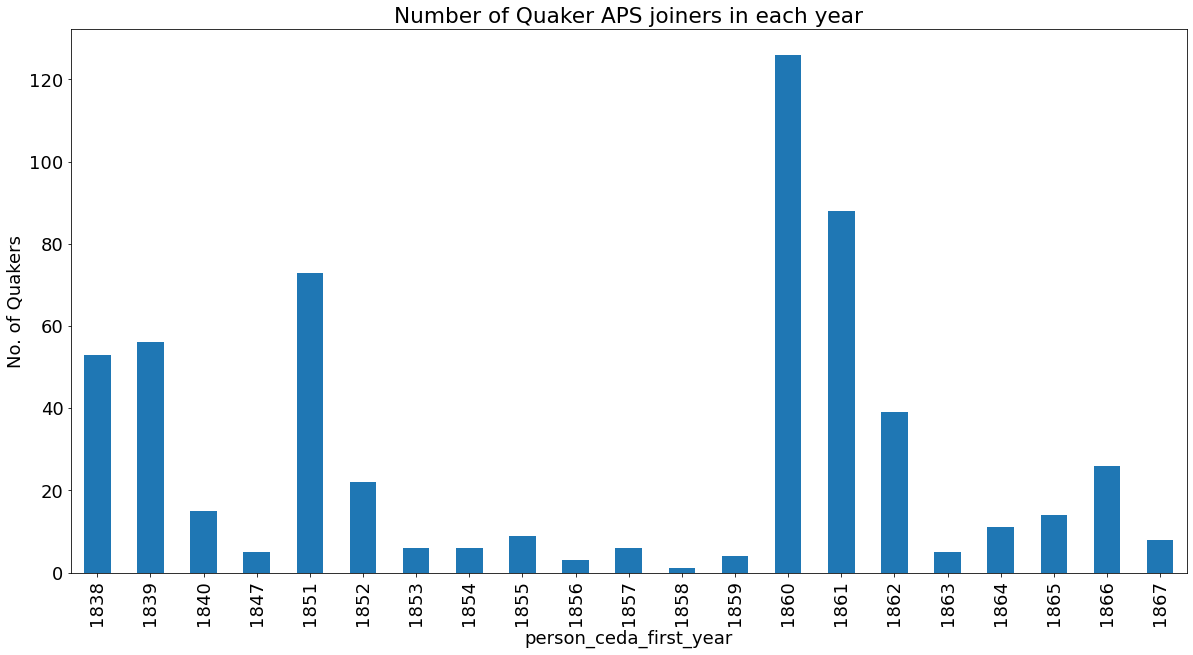

In [12]:
quakers_aps.groupby('person_ceda_first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker APS joiners in each year")
plt.ylabel ("No. of Quakers")
plt.show()

# 4.11 Quakers leaving the APS in each year #

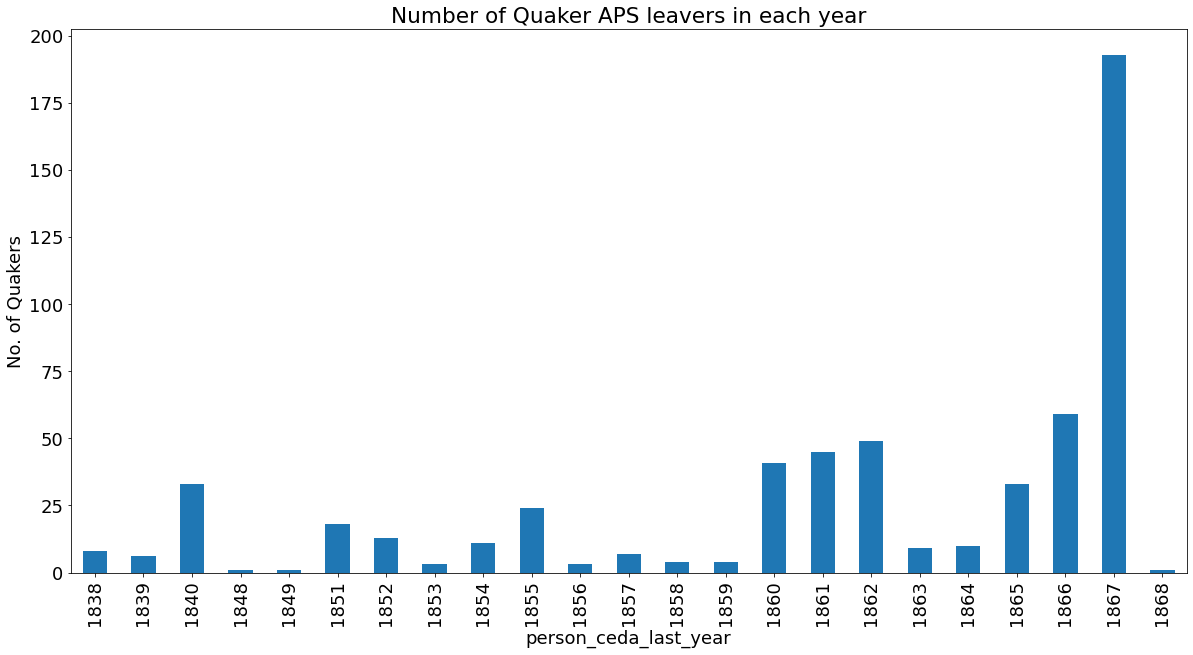

In [13]:
quakers_aps.groupby('person_ceda_last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker APS leavers in each year")
plt.ylabel ("No. of Quakers")
plt.show()

# 4.12 The Ethnological Society of London (ESL) 1843 - 1871 #

The Ethnological Society of London was the first intentionally academic society devoted to the discipline of anthropology in Britain. Secular by intent but if not always entirely so in its early years, it sought to be a place where those with a scientific interest in the field of ethnology could commune, share ideas and knowledge, and produce academic reports and hold academic meetings.  It met, performed its enquiries and reported its findings and recommendations to the Society’s members according to its own constitution (it usually met monthly). The Society’s remit, rules of engagement and characteristics were those of the many other scientific societies emerging at the time, its constitution being purposely compliant with BAAS requirements.  

In [14]:
esl = pd.read_csv ('vw_4_ceda_membership_dates_esl.csv')

# code not needed for this set because in this datframe birth_year and death_year show as 'object' and not 'float'
#esl['birth_year'] = esl ['birth_year'].fillna(0).astype(np.int64)
#esl['death_year'] = esl['death_year'].fillna(0).astype(np.int64)
# esl['religion_name'] = esl['religion_name'].fillna(0).astype(np.int64)
esl.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        748 non-null    object
 1   birth_year  436 non-null    object
 2   death_year  466 non-null    object
 3   Target      748 non-null    object
 4   first_year  748 non-null    int64 
 5   last_year   748 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 35.2+ KB


In [15]:
esl

,Name,birth_year,death_year,Target,first_year,last_year
0,William Adam,NaN,NaN,ESL,1844,1844
1,William (1) Adams,NaN,NaN,ESL,1844,1844
2,William (2) Adams,"1,820","1,900",ESL,1858,1871
3,Louis Agassiz,"1,807","1,873",ESL,1860,1871
4,Augustine Aglio,"1,777","1,857",ESL,1843,1845
...,...,...,...,...,...,...
743,James Wyld,"1,812","1,887",ESL,1844,1854
744,Ashton Yates,"1,781","1,863",ESL,1860,1862
745,W Holt Yates,"1,802","1,874",ESL,1844,1846
746,James Yearsley,"1,805","1,869",ESL,1845,1845


In [16]:
quakers_esl = pd.read_csv ('vw_4_ceda_membership_quakers_esl2.csv') 
quakers_esl

,Name,birth_year,death_year,religion_name,ceda_name,person_ceda_first_year,person_ceda_last_year
0,William Horton Lloyd,NaN,NaN,Quaker,ESL,1844,1847
1,Joseph Lister,1827.0,1912.0,Quaker,ESL,1844,1847
2,Thomas (1) Hodgkin,1798.0,1866.0,Quaker,ESL,1844,1862
3,John Henry Gurney,1819.0,1890.0,Quaker,ESL,1860,1867
4,Charles Henry Fox,NaN,NaN,Quaker,ESL,1861,1871
5,William Fowler,NaN,NaN,Quaker,ESL,1851,1851
6,Robert Nicholas Fowler,1828.0,1891.0,Quaker,ESL,1851,1871
7,David Dale,1829.0,1906.0,Quaker,ESL,1860,1863
8,x Collier,NaN,NaN,Quaker,ESL,1844,1844
9,William Clay,1791.0,1869.0,Quaker,ESL,1861,1868


									
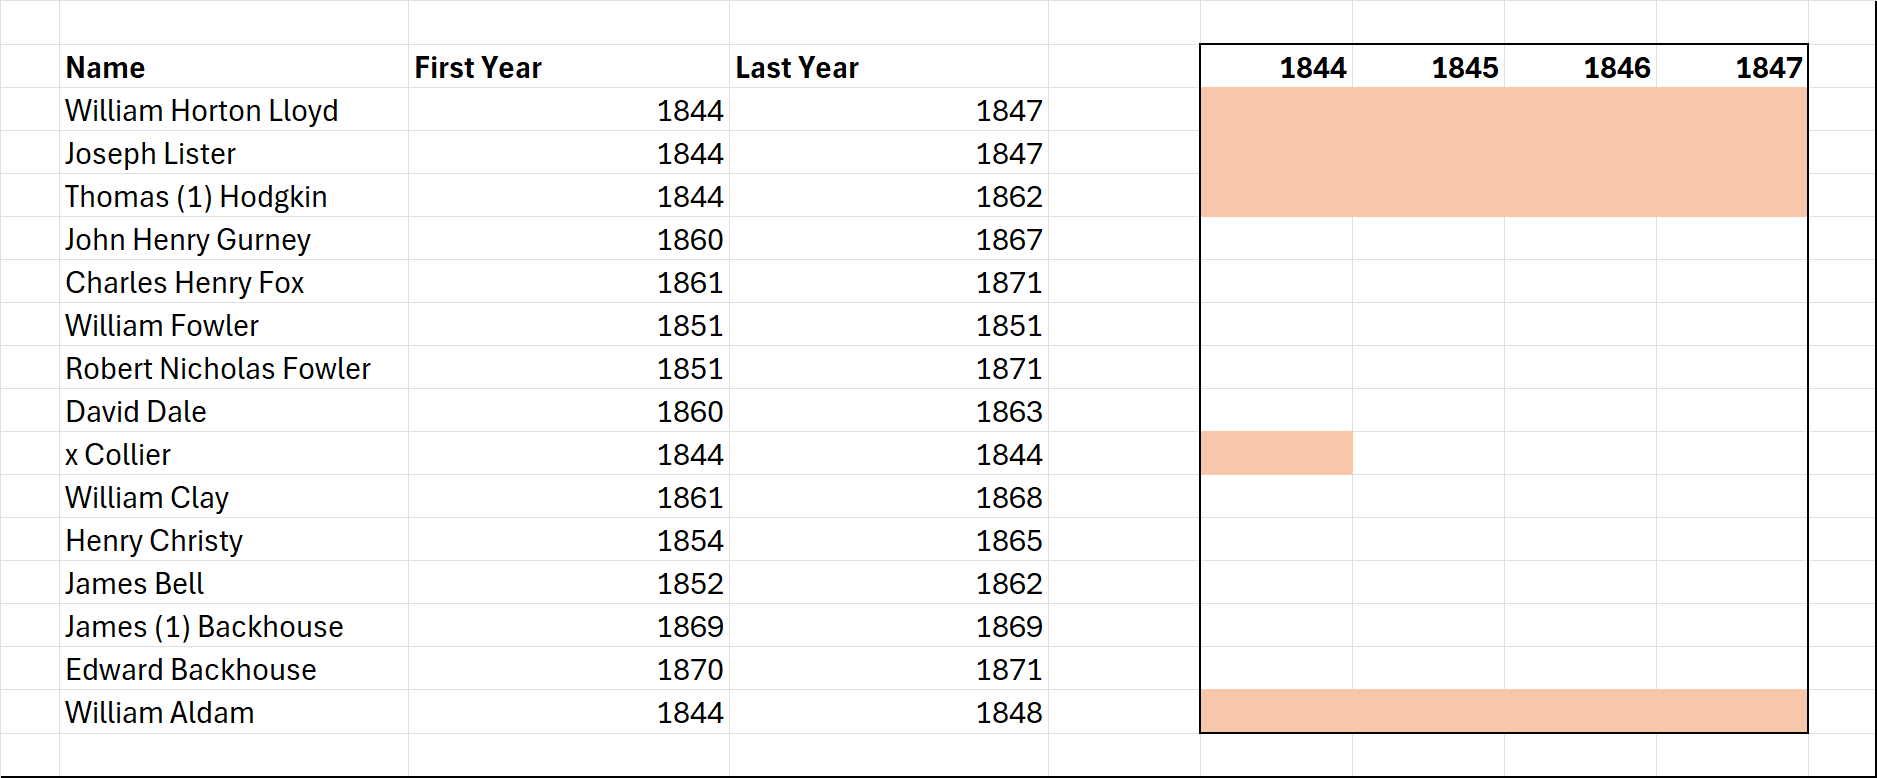

# 4.13 ESL joiners in each year  #

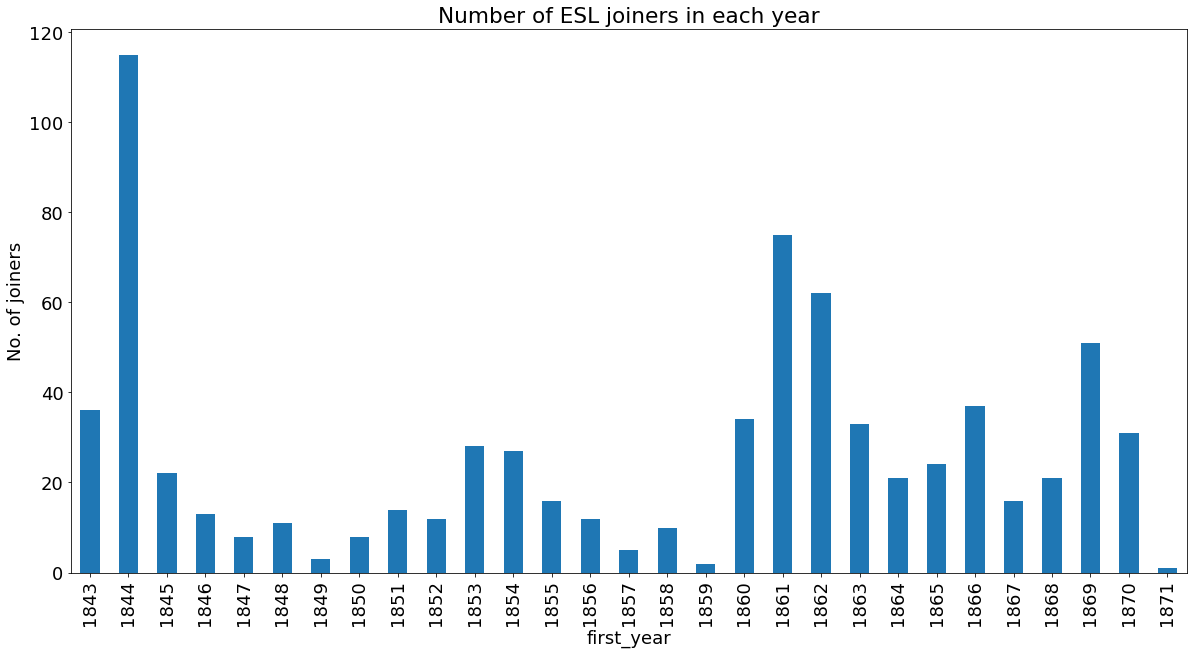

In [17]:
esl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of ESL joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 4.14 ESL leavers in each year #

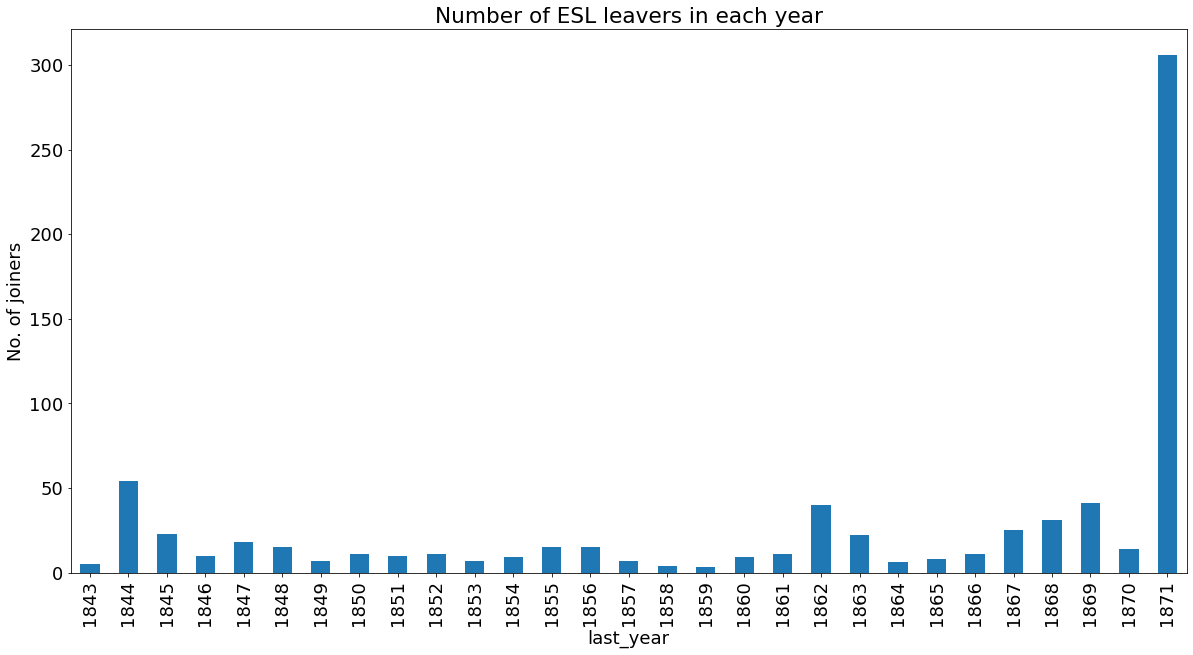

In [18]:
esl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of ESL leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 4.15 ESL Quaker joiners in each year #

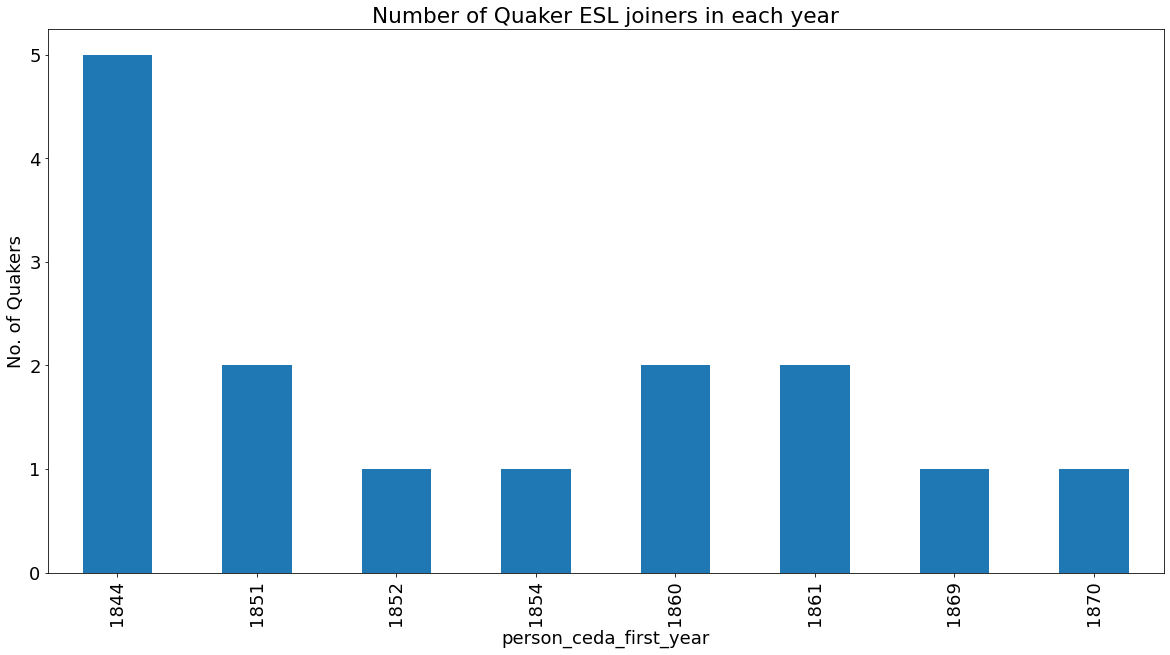

In [19]:
quakers_esl.groupby('person_ceda_first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker ESL joiners in each year")
plt.ylabel ("No. of Quakers")
plt.show()

# 4.16 ESL Quaker leavers in each year #

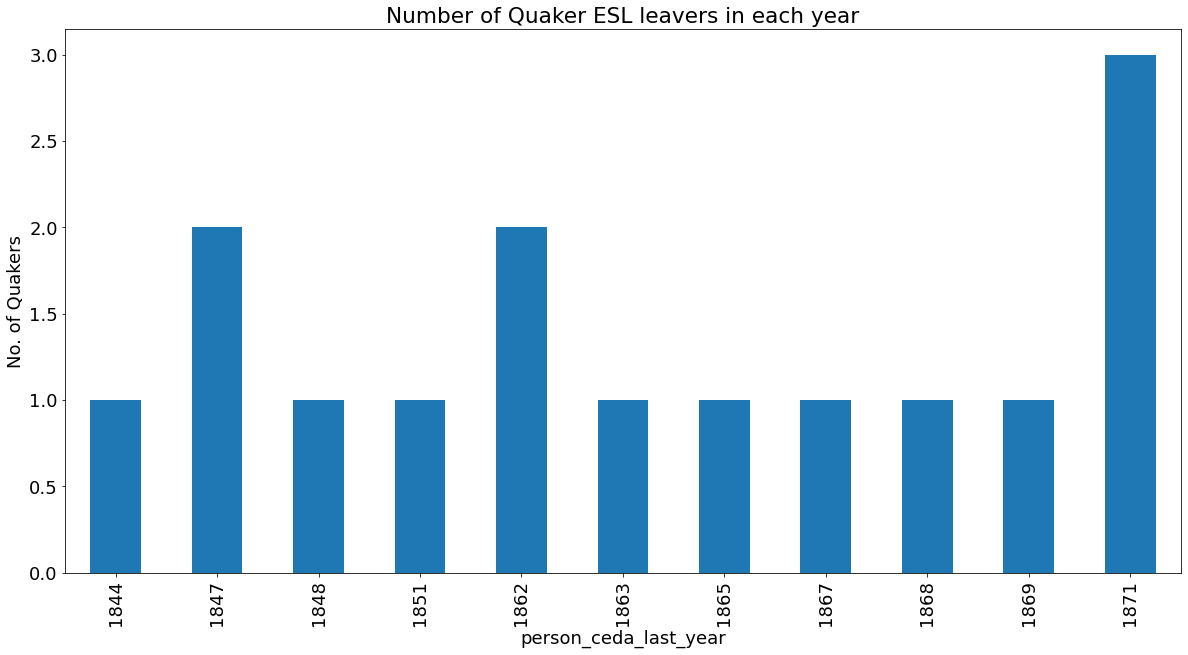

In [20]:
quakers_esl.groupby('person_ceda_last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker ESL leavers in each year")
plt.ylabel ("No. of Quakers")
plt.show()

# 4.17 The Anthropological Society of London (ASL) 1863 - 1871 #

In [21]:
asl = pd.read_csv ('vw_4_ceda_membership_dates_asl.csv')
asl['birth_year'] = asl ['birth_year'].fillna(0).astype(np.int64)
asl['death_year'] = asl['death_year'].fillna(0).astype(np.int64)

In [22]:
asl.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1334 non-null   object
 1   birth_year  1334 non-null   int64 
 2   death_year  1334 non-null   int64 
 3   Target      1334 non-null   object
 4   first_year  1334 non-null   int64 
 5   last_year   1334 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 62.7+ KB


In [23]:
asl

,Name,birth_year,death_year,Target,first_year,last_year
0,Arthur William A Beckett,1844,1909,ASL,1864,1867
1,Andrew Mercer Adam,0,0,ASL,1865,1867
2,H R Adam,0,0,ASL,1870,1871
3,Henry John Adams,0,0,ASL,1864,1869
4,William Adlam,0,0,ASL,1863,1866
...,...,...,...,...,...,...
1329,Stephen Yeldham,1810,1896,ASL,1866,1869
1330,James A Youl,1811,1904,ASL,1864,1865
1331,Robert Younge,1801,1874,ASL,1865,1871
1332,Arthur de Zeltner,0,0,ASL,1866,1871


In [24]:
quakers_asl = pd.read_csv ('vw_4_ceda_membership_quakers_asl2.csv') 

# 4.18 ASL joiners in each year #

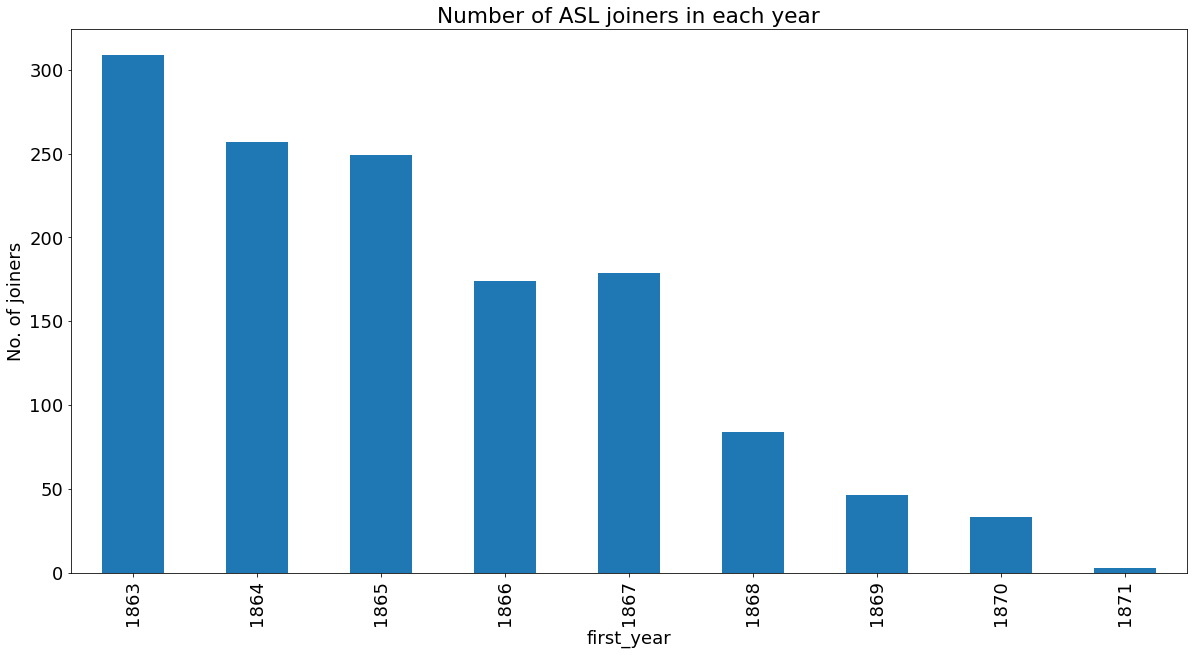

In [25]:
asl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of ASL joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 4.19 ASL leavers in each year #

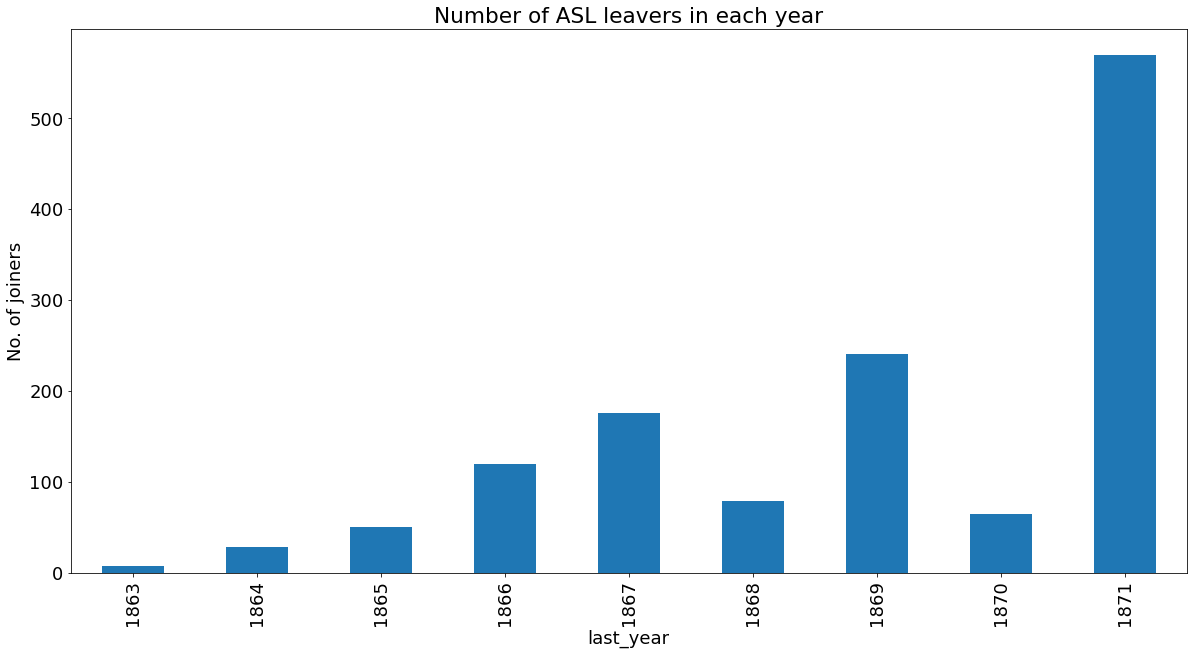

In [26]:
asl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of ASL leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 4.20 ASL Quaker joiners in each year #

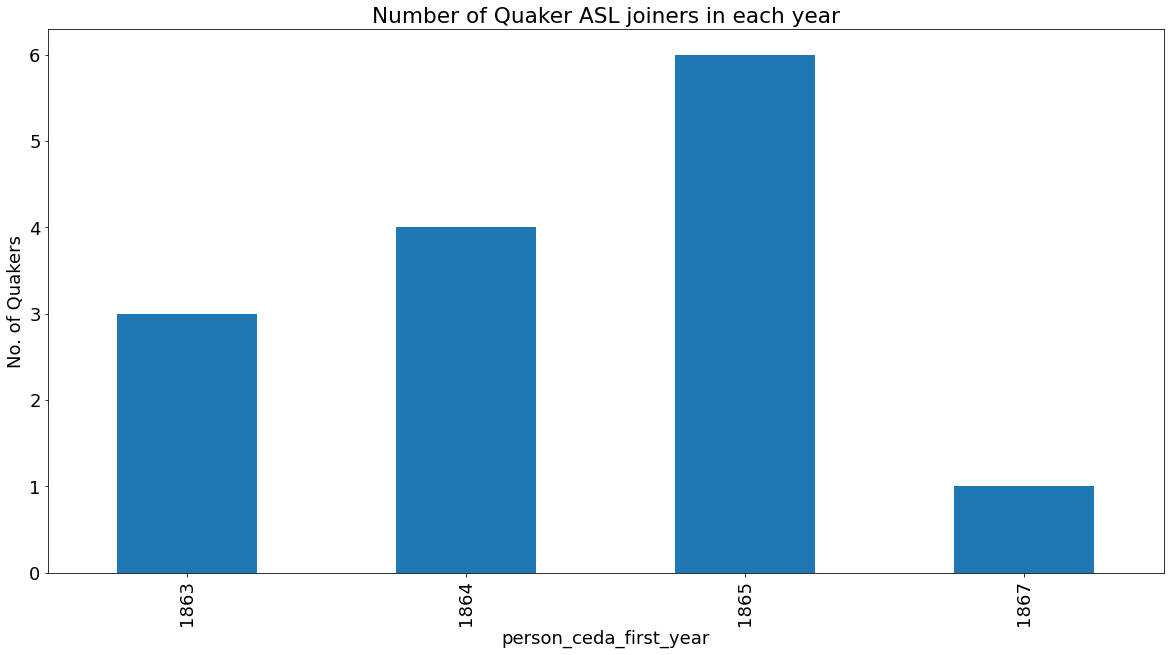

In [27]:
quakers_asl.groupby('person_ceda_first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker ASL joiners in each year")
plt.ylabel ("No. of Quakers")
plt.show()


# 4.21 ASL Quaker leavers in each year #

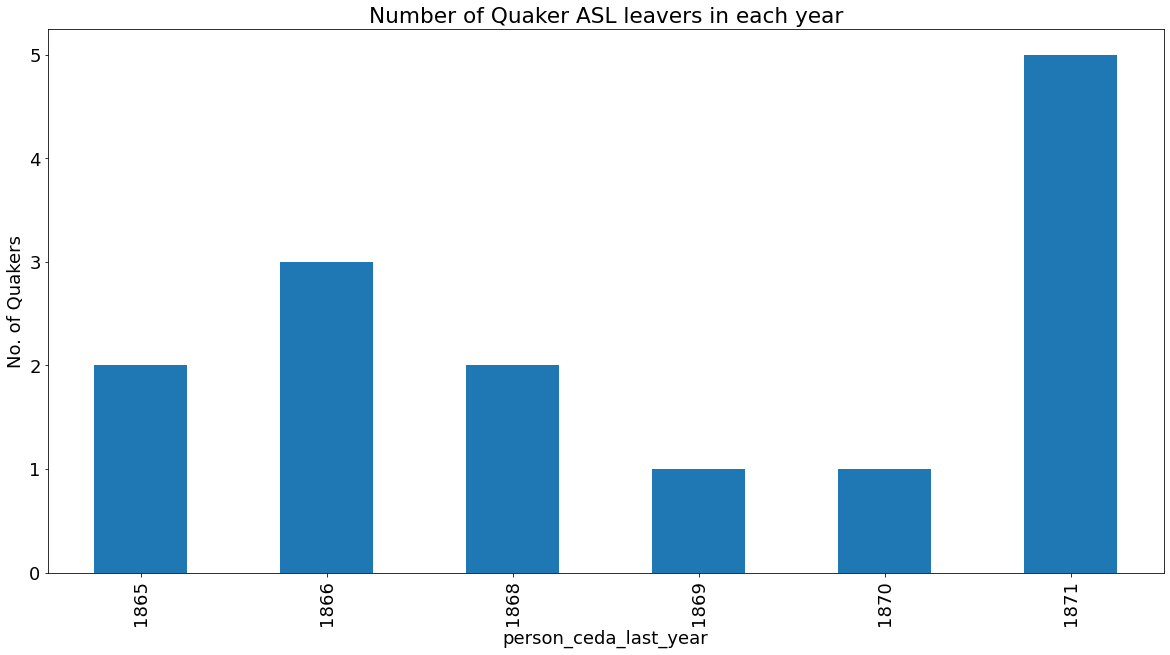

In [28]:
quakers_asl.groupby('person_ceda_last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker ASL leavers in each year")
plt.ylabel ("No. of Quakers")
plt.show()

In [29]:
quakers_asl = pd.read_csv ('vw_4_ceda_membership_quakers_asl2.csv') 
quakers_asl

,Name,birth_year,death_year,religion_name,ceda_name,person_ceda_first_year,person_ceda_last_year
0,William Spicer Wood,NaN,1902.0,Quaker,ASL,1863,1871
1,William Wilson,1785.0,1868.0,Quaker,ASL,1865,1866
2,James Wilson,NaN,NaN,Quaker,ASL,1865,1865
3,E T Wakefield,NaN,NaN,Quaker,ASL,1865,1868
4,J Robinson,NaN,NaN,Quaker,ASL,1865,1865
5,Jonathan Hutchinson,1828.0,1913.0,Quaker,ASL,1863,1871
6,William Holmes,NaN,NaN,Quaker,ASL,1865,1869
7,George Stacey Gibson,1818.0,1883.0,Quaker,ASL,1864,1866
8,James T J Doyle,NaN,NaN,Quaker,ASL,1865,1868
9,Henry Crowley,NaN,1887.0,Quaker,ASL,1864,1871


														
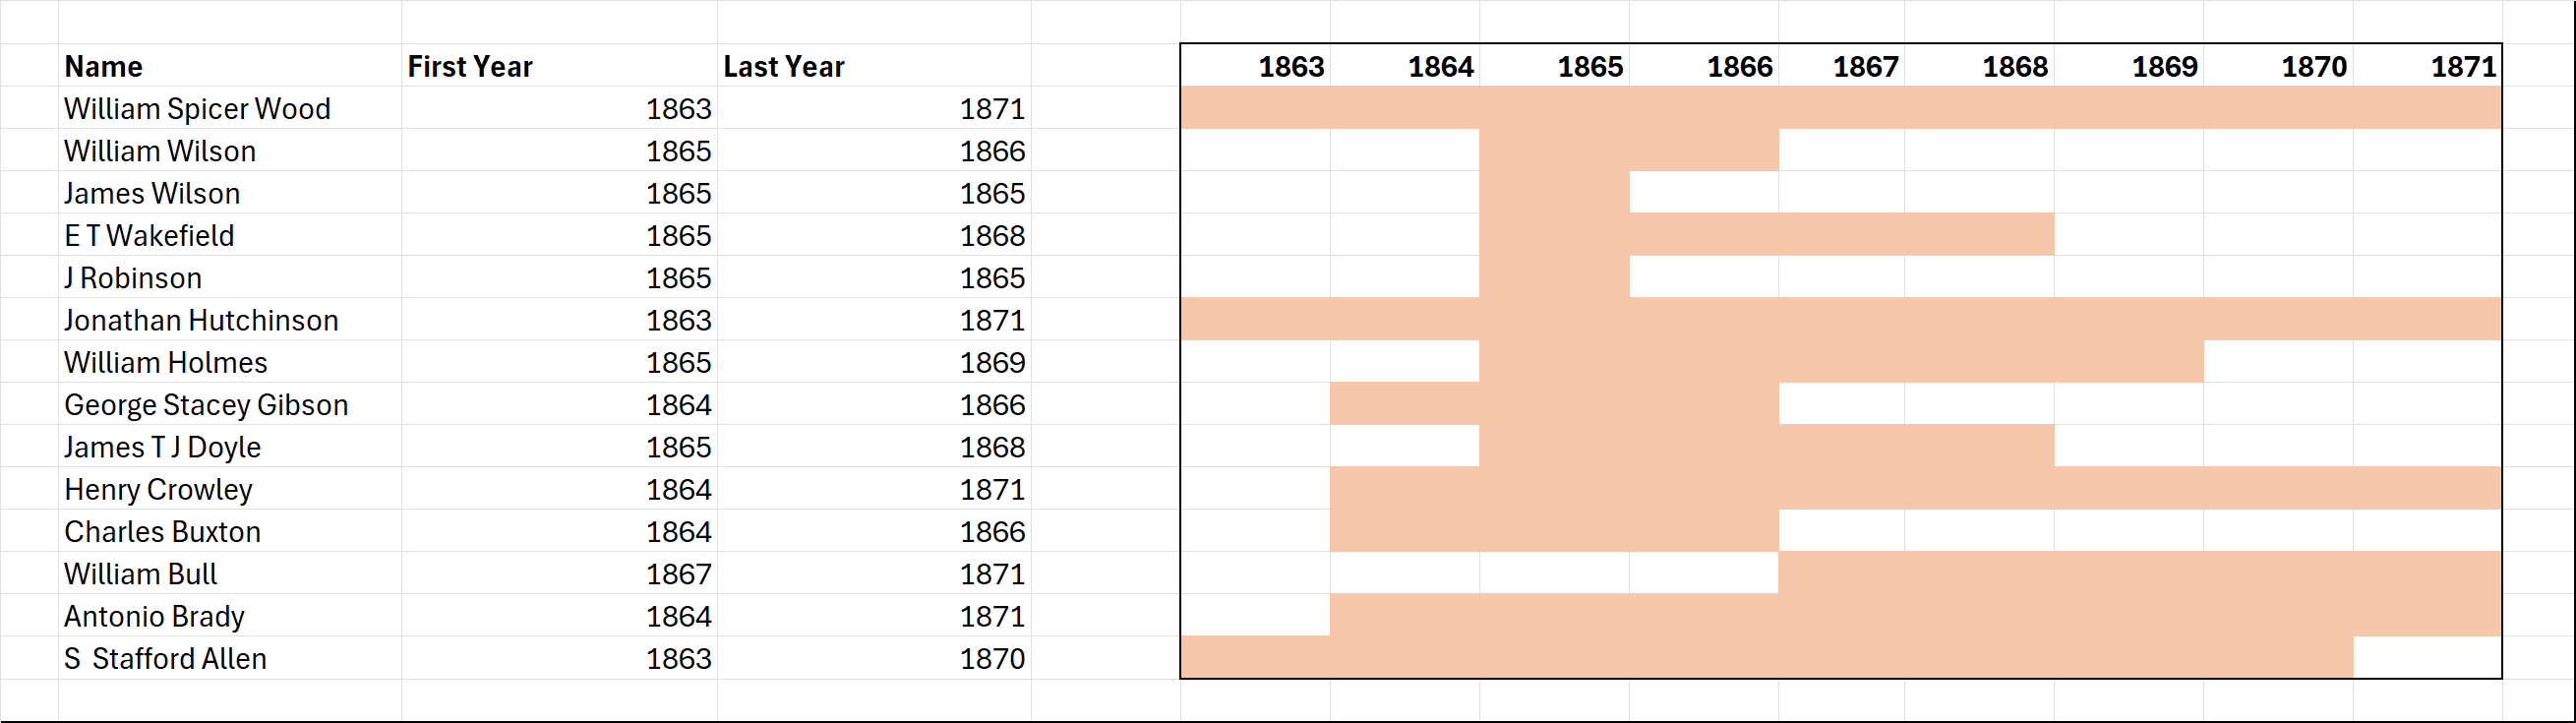

# 4.22 Anthropological Institute (AI) 1843 - 1871 #

In [30]:
ai = pd.read_csv ('vw_4_ceda_membership_dates_ai.csv')
# code not needed for this set because in this datframe birth_year and death_year show as 'object' and not 'float'
#ai['birth_year'] = ai ['birth_year'].fillna(0).astype(np.int64)
#ai['death_year'] = ai['death_year'].fillna(0).astype(np.int64)


In [31]:
ai.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        610 non-null    object
 1   birth_year  399 non-null    object
 2   death_year  436 non-null    object
 3   Target      610 non-null    object
 4   first_year  610 non-null    int64 
 5   last_year   610 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 28.7+ KB


In [32]:
ai

,Name,birth_year,death_year,Target,first_year,last_year
0,H R Adam,NaN,NaN,AI,1870,1871
1,William (2) Adams,"1,820","1,900",AI,1858,1871
2,Louis Agassiz,"1,807","1,873",AI,1860,1871
3,Alexander Muirhead Aitken,NaN,NaN,AI,1864,1871
4,William Amhurst Tyssen Amhurst,"1,835","1,909",AI,1862,1871
...,...,...,...,...,...,...
605,Robert Carr Woods,"1,816","1,875",AI,1863,1871
606,Francis Beresford Wright,"1,837","1,911",AI,1870,1871
607,Thomas Wright,"1,810","1,877",AI,1853,1871
608,Robert Younge,"1,801","1,874",AI,1865,1871


In [33]:
quakers_ai = pd.read_csv ('vw_4_ceda_membership_quakers_ai2.csv') 
quakers_ai

,Name,birth_year,death_year,religion_name,ceda_name,person_ceda_first_year,person_ceda_last_year
0,William Spicer Wood,NaN,1902.0,Quaker,AI,1863,1871
1,Jonathan Hutchinson,1828.0,1913.0,Quaker,AI,1863,1871
2,Charles Henry Fox,NaN,NaN,Quaker,AI,1861,1871
3,Robert Nicholas Fowler,1828.0,1891.0,Quaker,AI,1851,1871
4,Henry Crowley,NaN,1887.0,Quaker,AI,1864,1871
5,William Bull,1828.0,1902.0,Quaker,AI,1867,1871
6,Antonio Brady,1811.0,1881.0,Quaker,AI,1864,1871
7,Edward Backhouse,1808.0,1879.0,Quaker,AI,1870,1871


# 4.23 AI joiners in each year #

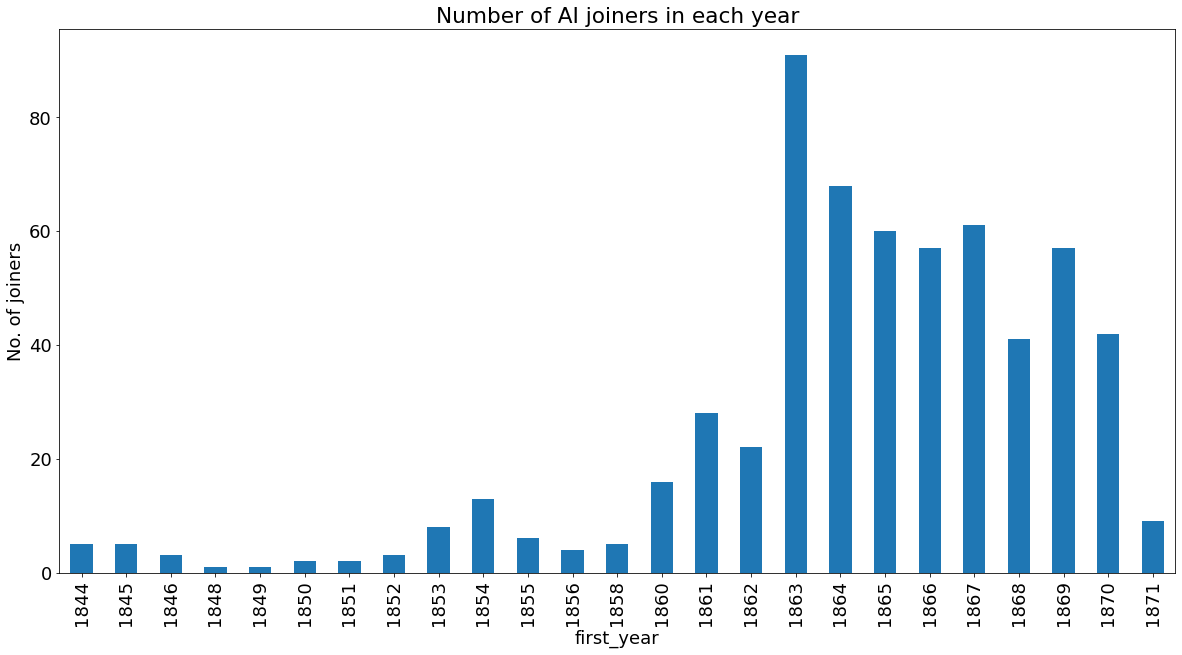

In [34]:
ai.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of AI joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 4.24 AI leavers in each year #

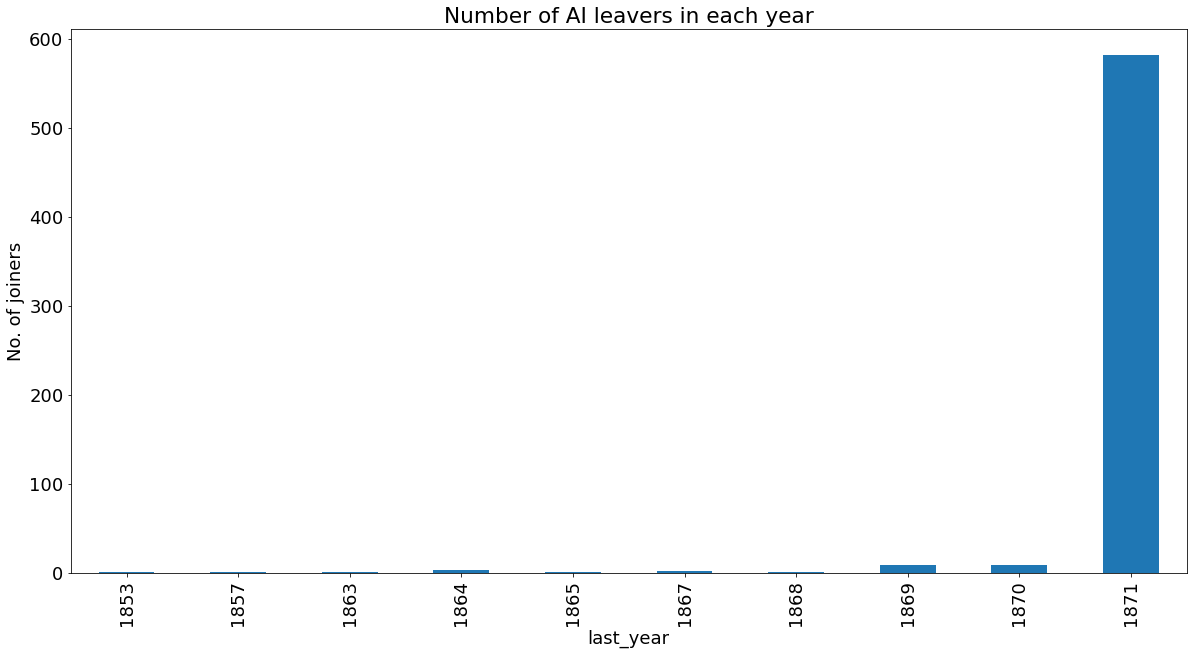

In [35]:
ai.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of AI leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# 4.25 AI Quaker joiners in each year #

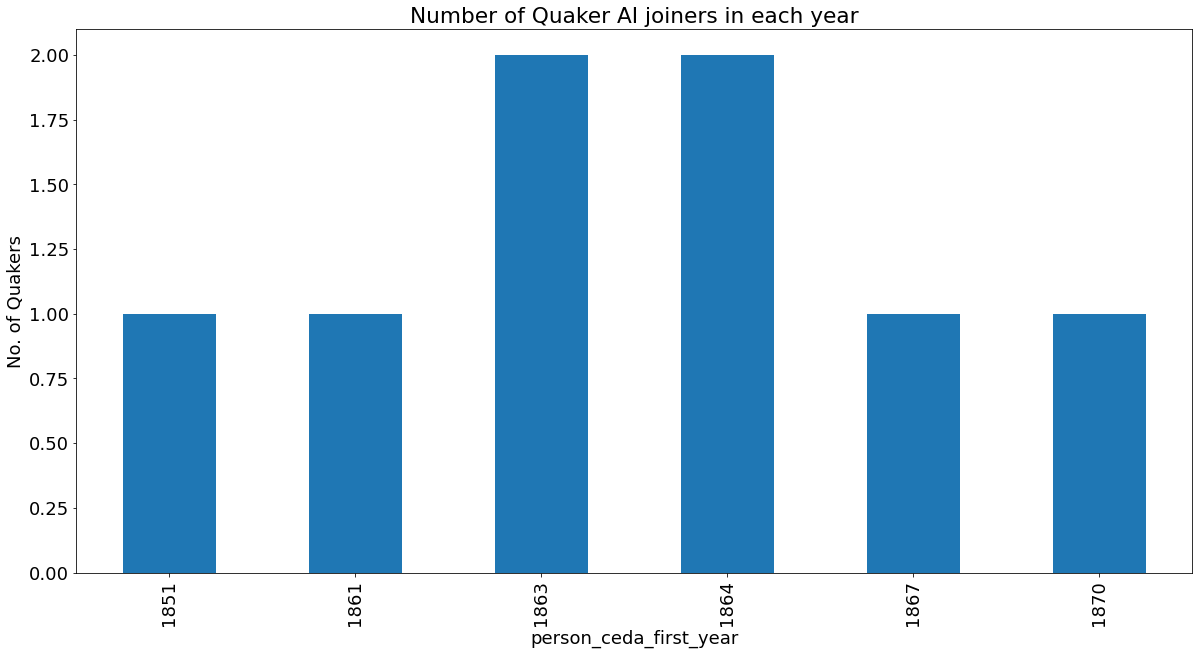

In [36]:
quakers_ai.groupby('person_ceda_first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker AI joiners in each year")
plt.ylabel ("No. of Quakers")
plt.show()

# 4.26 AI Quaker leavers in each year #

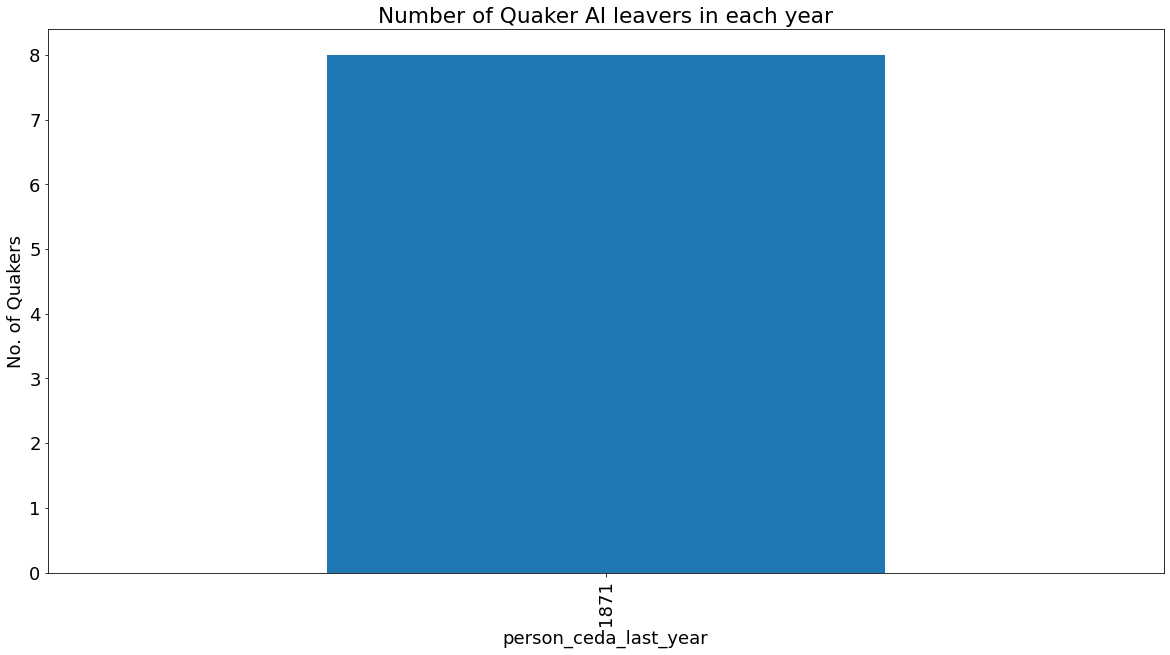

In [37]:
quakers_ai.groupby('person_ceda_last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker AI leavers in each year")
plt.ylabel ("No. of Quakers")
plt.show()

# 4.27 Duration of AI Quaker memberships #

														
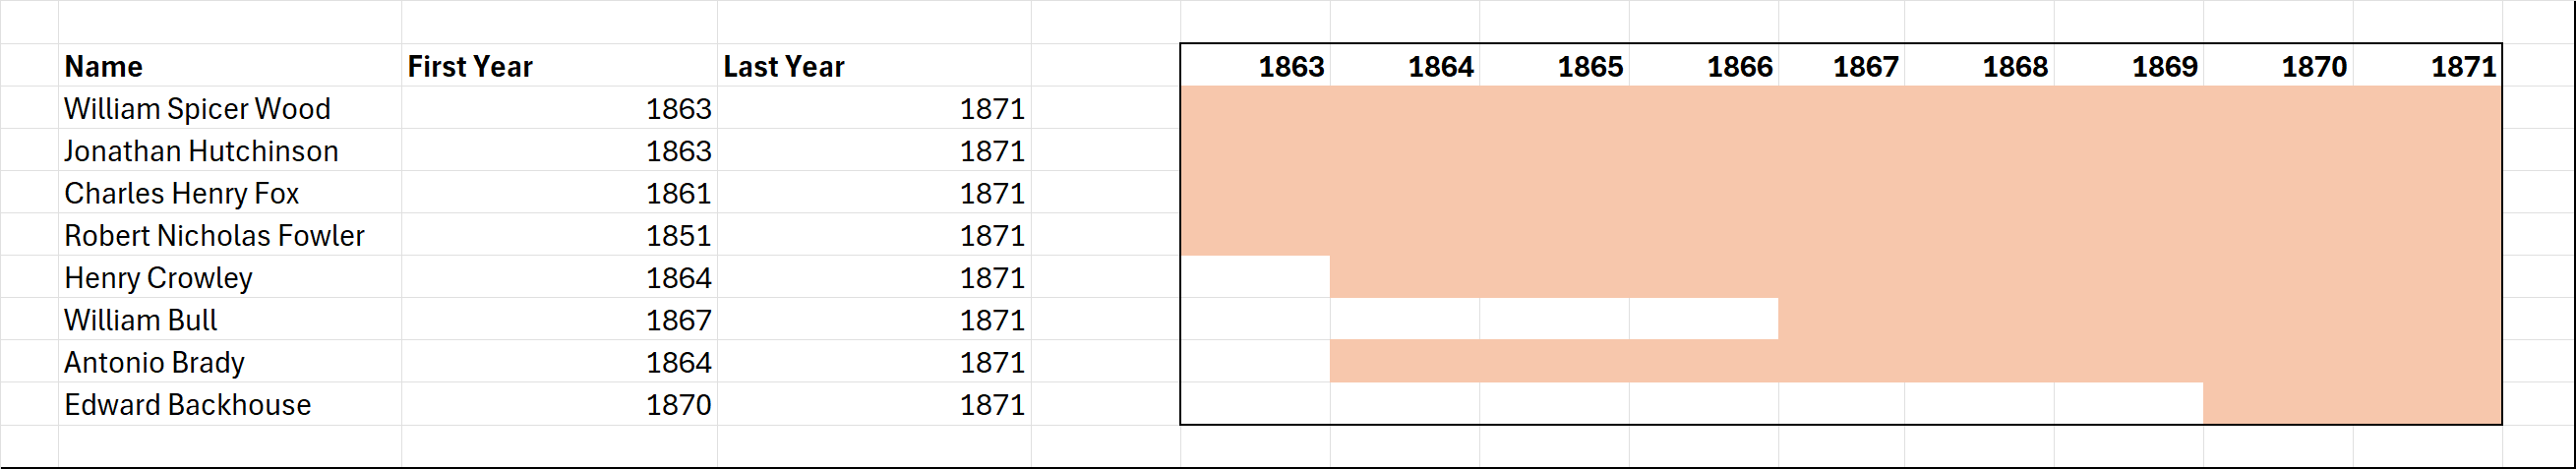

# 4.28 generate gexf output file of all CEDA data for Gephi #

In [38]:
with open('vw_1_person_with_quakers2.csv', 'r') as nodecsv: # Open the Nodes csv file
    nodereader = csv.reader(nodecsv) # Read the csv
    nodes = [n for n in nodereader][1:]# Retrieve the data (using Python list comprhension and list slicing
                                       # to remove the header row
    node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('vw_hddt_ceda_tuples_attributes2.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edge_list = list(edgereader) # Convert to list, so can iterate below in for loop
    
    # Create empty arrays to store edge data and edge attribute data
    edges = []
    edges_attributes = []
    
    # Fill the arrays with data from CSV
    for e in edge_list[1:]:
        edges.append(tuple(e[0:2])) # Get the first 2 columns (source, target) and add to array
        edges_attributes.append(tuple(e[2:4])) # Get the 3rd and 4th columns (first_year, last_year) and add to array
    
edge_names = [e[0] for e in edges] # Get a list of only the edge names   


In [39]:
print("Nodes length: ", len(node_names))
print("Edges length: ", len(edges))
print("Edges attributes length: ", len(edges_attributes)) # This should be the same length as edges


Nodes length:  3094
Edges length:  4046
Edges attributes length:  4046


In [40]:
print("First 5 nodes:", node_names[0:5])
print("First 5 edges:", edges[0:5])
print("First 5 edges attributes:", edges_attributes[0:5])

# The output will appear below this code cell.


First 5 nodes: ['Arthur William A Beckett', 'Andrew Mercer Adam', 'H R Adam', 'William Adam', 'Henry John Adams']
First 5 edges: [('William Adam', 'ESL'), ('William (1) Adams', 'ESL'), ('William (2) Adams', 'ESL'), ('Louis Agassiz', 'ESL'), ('Augustine Aglio', 'ESL')]
First 5 edges attributes: [('1844', '1844'), ('1844', '1844'), ('1858', '1871'), ('1860', '1871'), ('1843', '1845')]


In [41]:
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3100
Number of edges: 4021
Average degree:   2.5942


In [42]:
# Nodes

birth_year_dict = {}
death_year_dict = {}
religion_id_dict = {}

# Edges
first_year_dict = {}
last_year_dict = {}

In [43]:
for node in nodes: # Loop through the list, one row at a time
    
    birth_year_dict [node[0]] = node[1]
    death_year_dict [node[0]] = node[2]
    religion_id_dict[node[0]] = node[3]
    
   

In [44]:
for i, edge in enumerate(edges): # Loop through the list, one row at a time
    first_year_dict [(edge[0], edge[1])] = edges_attributes[i][0]
    last_year_dict [(edge[0], edge[1])] = edges_attributes[i][1]

In [45]:
# print(religion_id_dict)# list Source, target and first_year (all records). This shows the data that will be exported to Gephi.
# print(len(religion_id_dict))# At the end of the file print a count of all first_year check 3946)
# print (religion_id_dict)

In [46]:
# Nodes
nx.set_node_attributes(G, birth_year_dict, 'birth_year')
nx.set_node_attributes(G, death_year_dict, 'death_year')
nx.set_node_attributes(G, religion_id_dict, 'religion_id')

# Edges
nx.set_edge_attributes(G, first_year_dict, 'first_year')
nx.set_edge_attributes(G, last_year_dict, 'last_year')

In [47]:
#for n in G.nodes(): # Loop through every node, in our data "n" will be the name of the person
#print(n, G.nodes[n]['birth_year']) # Access every node by its name, and then by the attribute "birth_year"

In [48]:
nx.write_gexf(G, 'ceda_all_data_dyn_edges.gexf')
